<a href="https://colab.research.google.com/github/ranaabi/SKO/blob/main/TUBES_SKO_PERANCANGAN_FTTB_RANA_ABI_PRASUMA_1101184152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA** : Rana Abi Prasuma

**NIM** : 1101184152

**KELAS** : TT - 42 - 07

**Skenario** Perancangan **FTTB** pada apartement:

Satu apartement berisikan 60 **lantai**, tiap lantai terdapat 10 **kamar**. Dari sentral menuju ODC kemudian ke ONU kemudian ke ODP kemudian ke Roset. Dengan rencana tersebut kami akan menggunakan 6 **konektor** dan 2 **spliter**, dengan **spliter** 1:64 dengan **redaman** 19.5 dB **untuk ONU ke ODP** dan **spliter** 1:16 dengan **redaman** 13.5 dB **untuk ODP ke Roset**. Kami menggunakan fiber jenis **G625D** dengan **panjang gelombang** 1310 nm dengan **redaman** 0.35 dB/Km. Selain itu, dengan jumlah **konektor** 6 dan **splitter** 2, maka **splicer** ada 8 buah yang memiliki **redaman** 0.1 db.

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [35]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.85 #Responsivitas (A/W)
SM = 3 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 200*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 303 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#Parameter Pr
#jarak dari sentral ke ONU = 20 km
#jarak dari ONU ke Roset = <500 m --> 5*21 = 105 m 
#jarak total = 20000 + 105 = 20105 m

d = np.arange(0.105,20.106,1) #Jarak (km)
L_fiber = 0.35 #0.35 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #Loss dari splicer (db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 13.5 + 19.5 #loss dari splitter (dB) diambil redaman yang paling kecil, milik 1:32
Pt = 3 #Daya tx (dBm)

In [36]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-35.63675 -35.98675 -36.33675 -36.68675 -37.03675 -37.38675 -37.73675
 -38.08675 -38.43675 -38.78675 -39.13675 -39.48675 -39.83675 -40.18675
 -40.53675 -40.88675 -41.23675 -41.58675 -41.93675 -42.28675 -42.63675]


In [37]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [2.32136764e-04 2.14162745e-04 1.97580430e-04 1.82282059e-04
 1.68168219e-04 1.55147194e-04 1.43134368e-04 1.32051678e-04
 1.21827105e-04 1.12394207e-04 1.03691684e-04 9.56629845e-05
 8.82559361e-05 8.14224049e-05 7.51179843e-05 6.93017060e-05
 6.39357738e-05 5.89853181e-05 5.44181691e-05 5.02046479e-05
 4.63173737e-05]


In [38]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [2.85064754e-09 2.42629455e-09 2.06511159e-09 1.75769502e-09
 1.49604110e-09 1.27333748e-09 1.08378597e-09 9.22451462e-10
 7.85133528e-10 6.68257010e-10 5.68778961e-10 4.84109409e-10
 4.12043933e-10 3.50706264e-10 2.98499442e-10 2.54064229e-10
 2.16243730e-10 1.84053264e-10 1.56654734e-10 1.33334803e-10
 1.13486323e-10]


In [39]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[30.22365438 29.52756047 28.83116724 28.1344974  27.43757197 26.74041042
 26.04303073 25.34544957 24.64768231 23.94974319 23.25164536 22.553401
 21.85502133 21.15651673 20.4578968  19.75917041 19.06034573 18.36143033
 17.6624312  16.96335477 16.264207  ]


In [40]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[16.22380521 14.97435166 13.82064674 12.75542326 11.77195526 10.86401922
 10.02585781  9.25214611  8.53796007  7.87874716  7.27029901  6.70872599
  6.19043361  5.71210051  5.27065809  4.8632716   4.48732258  4.14039257
  3.82024806  3.52482648  3.25222328]


In [41]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[2.84128259e-56 7.64275402e-48 1.15415419e-40 1.49537497e-34
 2.38729499e-29 6.39531312e-25 3.74147756e-21 5.98479393e-18
 3.17039416e-15 6.54947718e-13 6.06508253e-11 2.83519639e-09
 7.40303646e-08 1.17702467e-06 1.22642185e-05 8.91620164e-05
 4.77074819e-04 1.96611416e-03 6.48739809e-03 1.77134485e-02
 4.11636062e-02]


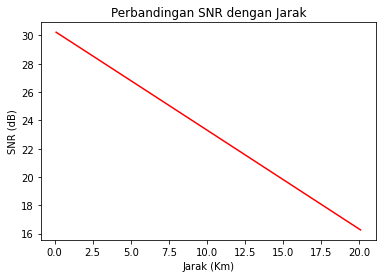

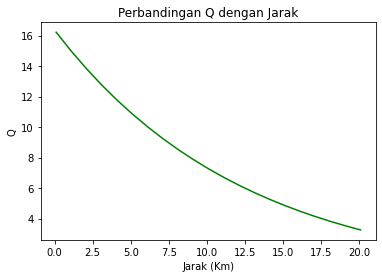

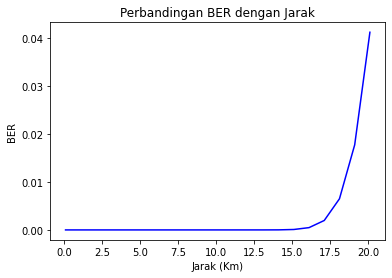

In [42]:
#GRAFIK
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan SNR dengan Jarak')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Q dengan Jarak')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan BER dengan Jarak')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()